In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [8]:
df = pd.read_csv(r"C:\Users\Asus\Documents\Dataset\horse.csv", low_memory=False)
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [9]:
df.shape

(299, 28)

In [10]:
for col in df.columns:
    print(col+' : ', df[col].nunique())

surgery :  2
age :  2
hospital_number :  283
rectal_temp :  40
pulse :  52
respiratory_rate :  40
temp_of_extremities :  4
peripheral_pulse :  4
mucous_membrane :  6
capillary_refill_time :  3
pain :  5
peristalsis :  4
abdominal_distention :  4
nasogastric_tube :  3
nasogastric_reflux :  3
nasogastric_reflux_ph :  20
rectal_exam_feces :  4
abdomen :  5
packed_cell_volume :  50
total_protein :  80
abdomo_appearance :  3
abdomo_protein :  37
outcome :  3
surgical_lesion :  2
lesion_1 :  61
lesion_2 :  6
lesion_3 :  2
cp_data :  2


In [11]:
df.drop_duplicates(inplace=True)
df.drop('hospital_number', axis=1, inplace=True)

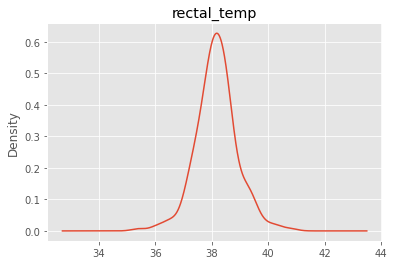

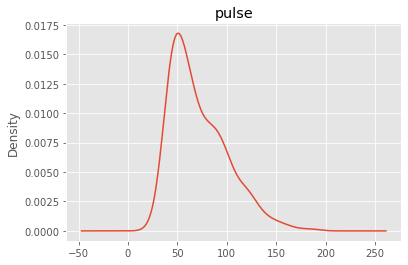

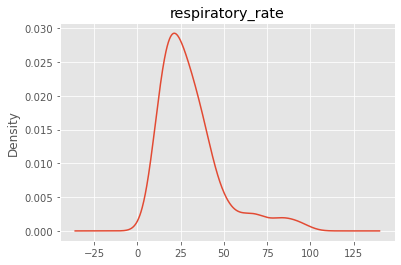

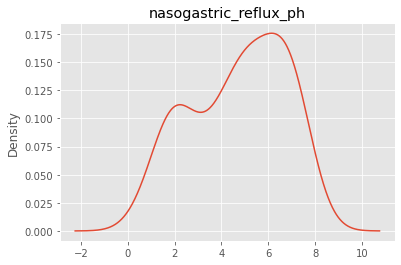

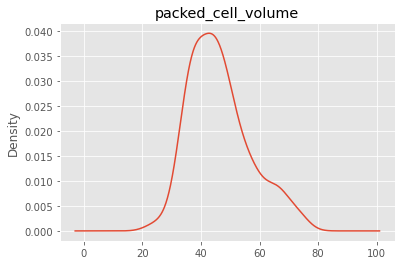

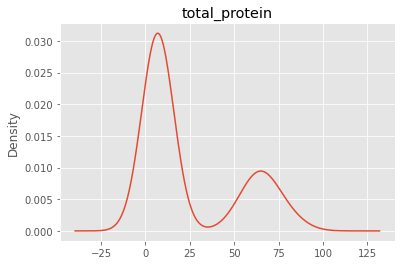

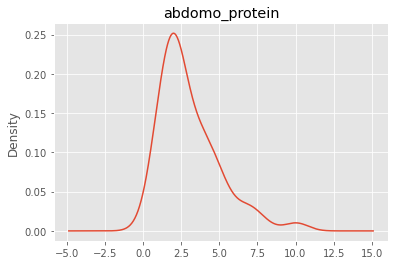

In [12]:
for col in df.select_dtypes('number').loc[:,df.select_dtypes('number').isna().mean()>0].columns:
    df[col].plot(kind='kde')
    plt.title(col)
    plt.show()

In [13]:
#filling missing cells in numerical columns
fill_by_mean = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'abdomo_protein']
fill_by_median = ['nasogastric_reflux_ph', 'total_protein']
for col in fill_by_mean:
    df[col] = df[col].fillna(df[col].mean())
for col in fill_by_median:
    df[col] = df[col].fillna(df[col].median())

In [14]:
df.select_dtypes('number').isna().sum()

rectal_temp              0
pulse                    0
respiratory_rate         0
nasogastric_reflux_ph    0
packed_cell_volume       0
total_protein            0
abdomo_protein           0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

In [15]:
#remove outliers

In [16]:
for col in df.select_dtypes('object').columns:
    if df[col].isna().mean() > 0.3:
        df.drop(col, axis=1, inplace=True)

In [17]:
for col in df.select_dtypes('object').columns:
    if df[col].isna().mean()>0:
        df[col] = df[col].fillna(df[col].mode()[0])

In [18]:
df.isna().mean()

surgery                  0.0
age                      0.0
rectal_temp              0.0
pulse                    0.0
respiratory_rate         0.0
temp_of_extremities      0.0
peripheral_pulse         0.0
mucous_membrane          0.0
capillary_refill_time    0.0
pain                     0.0
peristalsis              0.0
abdominal_distention     0.0
nasogastric_reflux_ph    0.0
packed_cell_volume       0.0
total_protein            0.0
abdomo_protein           0.0
outcome                  0.0
surgical_lesion          0.0
lesion_1                 0.0
lesion_2                 0.0
lesion_3                 0.0
cp_data                  0.0
dtype: float64

In [19]:
l_enc = LabelEncoder()
df['outcome'] = l_enc.fit_transform(df['outcome'])

In [20]:
df_cat = df.select_dtypes('object')
for col in df_cat.columns:
    print(df[col].value_counts())

yes    180
no     119
Name: surgery, dtype: int64
adult    275
young     24
Name: age, dtype: int64
cool      164
normal     78
warm       30
cold       27
Name: temp_of_extremities, dtype: int64
normal       183
reduced      103
absent         8
increased      5
Name: peripheral_pulse, dtype: int64
normal_pink      126
pale_pink         57
pale_cyanotic     41
bright_pink       30
bright_red        25
dark_cyanotic     20
Name: mucous_membrane, dtype: int64
less_3_sec    219
more_3_sec     78
3               2
Name: capillary_refill_time, dtype: int64
mild_pain       122
depressed        59
extreme_pain     42
alert            38
severe_pain      38
Name: pain, dtype: int64
hypomotile     171
absent          73
hypermotile     39
normal          16
Name: peristalsis, dtype: int64
none        131
slight       65
moderate     65
severe       38
Name: abdominal_distention, dtype: int64
yes    190
no     109
Name: surgical_lesion, dtype: int64
no     200
yes     99
Name: cp_data, dtype: i

In [21]:
df_cat.shape

(299, 11)

In [22]:
ordinal_list = ['abdominal_distention', 'peristalsis', 'pain', 'capillary_refill_time', 'mucous_membrane', 'peripheral_pulse', 'age']
nominal_list = ['cp_data', 'surgical_lesion', 'temp_of_extremities', 'surgery']

In [23]:
o_enc = OrdinalEncoder()
ord_df = o_enc.fit_transform(df[ordinal_list])

In [24]:
ord_df = pd.DataFrame(ord_df, columns=ordinal_list)
ord_df.head()

,abdominal_distention,peristalsis,pain,capillary_refill_time,mucous_membrane,peripheral_pulse,age
0,2.0,0.0,2.0,2.0,3.0,3.0,0.0
1,3.0,0.0,3.0,1.0,4.0,2.0,0.0
2,1.0,2.0,3.0,1.0,5.0,2.0,0.0
3,2.0,0.0,1.0,2.0,2.0,2.0,1.0
4,1.0,2.0,3.0,2.0,2.0,2.0,0.0


In [25]:
nom_df = pd.get_dummies(df[nominal_list], drop_first=True)


In [26]:
nom_df.head()

,cp_data_yes,surgical_lesion_yes,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,surgery_yes
0,0,0,1,0,0,0
1,0,0,1,0,0,1
2,1,0,0,1,0,0
3,1,1,0,0,0,1
4,0,0,1,0,0,0


In [27]:
df.drop(ordinal_list, axis=1, inplace=True)
df.drop(nominal_list, axis=1, inplace=True)
df = pd.concat([df,ord_df,nom_df], axis=1)
df.head()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,outcome,lesion_1,lesion_2,...,capillary_refill_time,mucous_membrane,peripheral_pulse,age,cp_data_yes,surgical_lesion_yes,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,surgery_yes
0,38.5,66.0,28.0,5.0,45.0,8.4,3.039604,0,11300,0,...,2.0,3.0,3.0,0.0,0,0,1,0,0,0
1,39.2,88.0,20.0,5.0,50.0,85.0,2.000000,1,2208,0,...,1.0,4.0,2.0,0.0,0,0,1,0,0,1
2,38.3,40.0,24.0,5.0,33.0,6.7,3.039604,2,0,0,...,1.0,5.0,2.0,0.0,1,0,0,1,0,0
3,39.1,164.0,84.0,5.0,48.0,7.2,5.300000,0,2208,0,...,2.0,2.0,2.0,1.0,1,1,0,0,0,1
4,37.3,104.0,35.0,5.0,74.0,7.4,3.039604,0,4300,0,...,2.0,2.0,2.0,0.0,0,0,1,0,0,0


In [28]:
X = df.drop('outcome', axis=1)
y = df['outcome']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 23), (60, 23), (239,), (60,))

Logistic Reg(used for binary classification)

KNN

In [25]:
knn = KNeighborsClassifier()

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
knn.score(X_train, y_train)

0.7782426778242678

In [28]:
y1 = knn.predict(X_test)
print(classification_report(y_test, y1))
print(confusion_matrix(y_test, y1))

              precision    recall  f1-score   support

           0       0.56      0.67      0.61        21
           1       0.17      0.20      0.18         5
           2       0.79      0.68      0.73        34

    accuracy                           0.63        60
   macro avg       0.51      0.51      0.51        60
weighted avg       0.66      0.63      0.64        60

[[14  2  5]
 [ 3  1  1]
 [ 8  3 23]]


In [29]:
accuracy_score(y_test, y1)

0.6333333333333333

In [30]:
param_grid = {
    'n_neighbors' : [3, 5, 10, 20],
    'weights' : ['uniform', 'distance'],
    'p' : [1, 2]
}
gs = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1)
gs.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 20], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [31]:
gs.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [32]:
gs.best_score_

0.6957062146892655

In [33]:
knn1 = KNeighborsClassifier(n_neighbors= 5, p= 2, weights= 'distance')
knn1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [34]:
knn1.score(X_train, y_train), knn1.score(X_test, y_test)

(1.0, 0.6666666666666666)

In [35]:
kf = KFold(n_splits=5, shuffle=True)
kf_res = cross_val_score(knn1, X, y, cv=kf)
print(kf_res.mean())

0.7359887005649718


Naive Bayes(Not suitable for multi class)

In [36]:
#gaussian is for continuous input features
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [37]:
y2 = nb.predict(X_test)
accuracy_score(y_test, y2)

0.48333333333333334

In [38]:
#bernoulli is used for binary classification plus categorical input features
nb1 = BernoulliNB()
nb1.fit(X_train, y_train)

BernoulliNB()

In [39]:
y3 = nb1.predict(X_test)
accuracy_score(y_test, y3)

0.6

In [40]:
#for text classification
nb2 = MultinomialNB()
nb2.fit(X_train, y_train)

MultinomialNB()

In [41]:
y4 = nb2.predict(X_test)
accuracy_score(y_test, y4)

0.2833333333333333

SVC

In [42]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [43]:
y5 = svm.predict(X_test)
accuracy_score(y_test, y5)

0.5166666666666667

In [44]:
svm.score(X_train, y_train)

0.6192468619246861

In [59]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [0.000001, 0.0000001, 0.00000001]#1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 
              #'kernel': ['linear', 'poly', 'rbf'] , 'sigmoid', 'precomputed'
              }
gs = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=1)
gs.fit(X, y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1e-06, 1e-07, 1e-08]},
             verbose=1)

In [60]:
gs.best_params_

{'C': 100, 'gamma': 1e-06}

In [61]:
gs.best_score_

0.6789265536723164

In [65]:
svm = SVC(C= 100, gamma= 1e-06)
svm.fit(X_train, y_train)

SVC(C=100, gamma=1e-06)

In [66]:
svm.score(X_train, y_train), svm.score(X_test, y_test)

(0.7656903765690377, 0.65)

Decision Tree

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
y6 = dt.predict(X_test)
accuracy_score(y_test, y6)

0.5333333333333333

In [50]:
dt.score(X_train, y_train)

1.0

In [75]:
param = {
    'max_depth': [None, 2, 3, 4],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3]
}
gs_dt = GridSearchCV(estimator=dt, param_grid=param, cv=5, verbose=1)

In [76]:
gs_dt.fit(X,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3]},
             verbose=1)

In [77]:
gs_dt.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [78]:
gs_dt.best_score_

0.6522033898305085

In [79]:
dt = DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 1, min_samples_split= 2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [80]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.7238493723849372, 0.65)

Random Forest

In [51]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(1.0, 0.6666666666666666)

In [104]:
param = {
    #'bootstrap': [True, False],
    #'max_depth': [1, 3, 5, None],
    'max_features': ['log2', 'sqrt', 'auto'],
    #'min_samples_leaf': [1, 2, 4],
    #'min_samples_split': [2, 3, 4],
    'n_estimators': [100, 145, 150, 155, 200, 300]
}

gs = GridSearchCV(estimator=rf, param_grid=param, cv=5, verbose=1)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='log2',
                                              n_estimators=150),
             param_grid={'max_features': ['log2', 'sqrt', 'auto'],
                         'n_estimators': [100, 145, 150, 155, 200, 300]},
             verbose=1)

In [105]:
gs.best_params_

{'max_features': 'log2', 'n_estimators': 145}

In [106]:
gs.best_score_

0.7223163841807909

In [107]:
rf = RandomForestClassifier(max_features= 'log2', n_estimators= 145)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=145)

In [108]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(1.0, 0.65)

Adaboost

In [53]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [54]:
ada.score(X_train, y_train), ada.score(X_test, y_test)

(0.7531380753138075, 0.5666666666666667)

In [112]:
param = {'n_estimators':list(range(2, 102, 2)), 
        'learning_rate':[0.1, 0.15, 0.01]}

gs = GridSearchCV(estimator=ada, param_grid=param, cv=5, verbose=1)
gs.fit(X,y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.15, 0.01],
                         'n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                          22, 24, 26, 28, 30, 32, 34, 36, 38,
                                          40, 42, 44, 46, 48, 50, 52, 54, 56,
                                          58, 60, ...]},
             verbose=1)

In [113]:
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 72}

In [114]:
gs.best_score_

0.7025988700564972

In [115]:
ada = AdaBoostClassifier(learning_rate= 0.1, n_estimators= 72)
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=72)

In [116]:
ada.score(X_train, y_train), ada.score(X_test, y_test)

(0.7740585774058577, 0.6)

XgBoost

In [31]:
xg = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [32]:
xg.score(X_train, y_train), xg.score(X_test, y_test)

(1.0, 0.5666666666666667)

In [33]:
params = {
 'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}
gs = GridSearchCV(estimator=xg, param_grid=params, cv=5, verbose=0)
gs.fit(X,y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', gamma=0, gpu_id=-1,
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constrain...
                                     objective='multi:softprob',
                                     predictor='auto', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos

In [34]:
gs.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rate': 0.25,
 'max_depth': 10,
 'min_child_weight': 1}

In [35]:
gs.best_score_

0.7224293785310735